In [159]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [160]:
input_file = './8.jpg'

In [161]:
img = cv2.imread(input_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

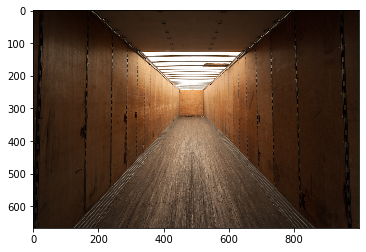

In [162]:
plt.imshow(img)

# 1. Get Hough Lines on input image

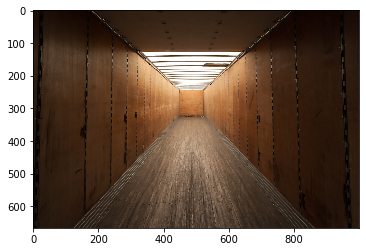

In [163]:
img = cv2.bilateralFilter(img, 5, 20, 20) #Applying Bilateral filter removing noisy little edges
plt.imshow(img)

In [204]:
edges = cv2.Canny(img, 100, 350, 3) # best one is 20, 100, 3

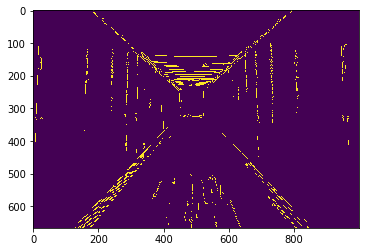

In [205]:
plt.imshow(edges)

In [145]:
edges.shape

(667, 1000)

In [212]:
h_lines = cv2.HoughLinesP(edges, rho = 1, theta = np.pi/180, threshold = 30, minLineLength = 10, maxLineGap = 0)
h_lines.shape

(354, 1, 4)

In [213]:
img = cv2.imread(input_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for line in h_lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(255,0,0),5)

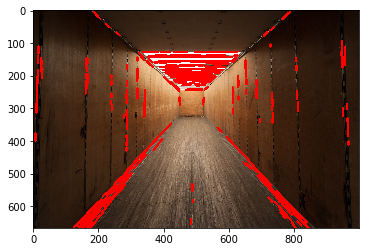

In [214]:
plt.imshow(img)

# 2. Find HOG features

In [149]:
from skimage.feature import hog

In [150]:
fd, hog_image = hog(img, orientations=8, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

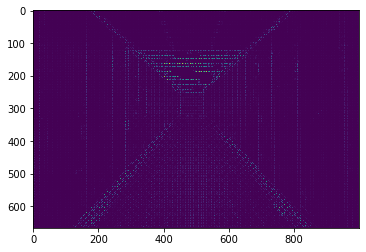

In [151]:
plt.imshow(hog_image)

In [152]:
hog_image.shape

(667, 1000)

# 3. Get Sobel maps

In [185]:
img = cv2.imread(input_file)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [186]:
sobel_kernel=3
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)

In [187]:
gradmag = np.sqrt(sobelx**2 + sobely**2)

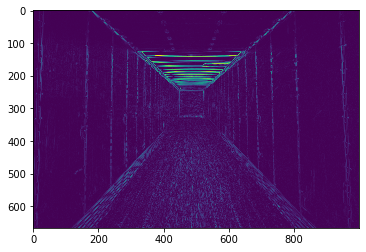

In [188]:
plt.imshow(gradmag)

# 4. Harris corner detection

In [259]:
import cv2
import numpy as np

filename = './8.jpg'

img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

In [260]:
corners.shape

(138, 2)

In [265]:
for i in corners:
    cv2.circle(img, (i[0], i[1]), 1, (255,0,0), 5) 

In [269]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR_RGB))

AttributeError: module 'cv2' has no attribute 'COLOR_BGR_RGB'